*The codes were developed on Windows 10, and were not tested on other machines. Anaconda 5.2.0 is chosen as a Python interpreter.*

This notebook introduces the concept and methodology of implementing Monte-Carlo Simulation.

# Monte-Carlo Simulation

> **Monte Carlo Simulation** is a technique to understand the impact of risk and uncertainty in 
finance, engineering, supply chain, and virtually anything. A Monte Carlo simulator helps
one to visualize most or all of the potential outcomes to have a better idea regaring the
risk of a decision.

Based on historical data, expertise in the field, or past experience, you can draw an estimate of a population. While this estimate is useful for developing a model, it contains some inherent uncertainty and risk, because it's an estimate of an unknown value. In a financial market, you might know the distribution of possible values through the mean and standard deviation of returns. By using a range of possible values, instead of a single guess, you can create a more realistic picture of what might happen in the future. 

Let's assume that your consultant recommended you a certain investment program that has a mean return rate of 10% and standard deviation of 1%. You made 100 investments through this program, but your 100 investments had an average rate of return of 3%. Did the consultant lie to you, or is it one of the possible corner cases that you can have if you are unlucky? What is the P10, P50, P90 value of this investment program? What is the the most plausible *range* of rate of return? Does your 3% rate of return fall within that *range*?

Monte-Carlo simulation comes in handy when addressing uncertainty of such cases with a known distribution.

<div class="alert alert-info">
    <h4>Warning!</h4>
    <p>In order to use Monte-Carlo simulation, you must know the distribution shape (normal, lognormal, poisson, etc..) and summary statistics (mean, standard deviation, variance, skewness, etc..) of the data. If you do not have enough samples to draw an uncertainty model, <b>Bootstrap</b> simulation may address your issue.</p>
</div>



## 1. Casino Dice Roll Example

How do casinos earn money? The answer is simple - the longer you play, the bigger the chance of you losing money.

Let's assume an imaginary dice roll game between a casino house and a player. The rules are simple.

** Dice Roll Game Rules **

1. There is an imaginary dice that rolls between 1 to 100.
2. If a player rolls between 1 to 51, the house wins.
3. If a player rolls between 52 to 100, the player wins.
4. A player can bet as many times as he wants.

With the above rules, **the house has 2% higher chance of winning over a player**. As a financial analyst of the house, you want to address the following questions:

<div class="alert alert-info">
    <p><b>Question 1: </b>What is the typical range (uncertainty) of profit from the Dice Roll game?</p>
    <p><b>Question 2: </b>With $100 wager for each bet, how many bets will be required until a player loses all his money?</p>
</div>

Monte-Carlo simulation can be used to simulate the possible outcomes of dice roll game.

### 1.0 Game Simulator Scripts

**Imports**

In [4]:
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib notebook

** Dice Roll Simulation **

In [5]:
def rolldice():
    dice = random.randint(1,100)
    if dice <= 51:                     # Player loses
        return False
    elif dice > 51 & dice <= 100:      # Player wins
        return True

** Single Game Simulation **

In [106]:
def play(total_funds, wager_amount, total_plays, final_fund):

    play_num = []       # x-axis of the plot
    funds = []          # y-axis of the plot

    play = 1
    while play <= total_plays:
        
        if rolldice():                                # Player wins
            total_funds = total_funds + wager_amount  # updates current total funds
            play_num.append(play)
            funds.append(total_funds)

        else:                                         # Player loses
            total_funds = total_funds - wager_amount 
            play_num.append(play)
            funds.append(total_funds)
            
        play = play + 1

    final_fund.append(funds[-1])                      # final_fund contains the ending fund of all players
    
    return final_fund, play_num, funds          

** Results Visualization **

In [107]:
def simulate_visualize(init_money, bet, num_bet, num_players=1):      # simulates and generates a plot
    f, ax = plt.subplots()
    count = 1
    ending_fund_all_players = []
    while count <= num_players:
        ending_fund_all_players, num_play, funds_record = play(init_money, bet, num_bet, ending_fund_all_players)
        ax.plot(num_play,funds_record)
        count += 1

    ax.set_title(str(num_players) + ' Player(s): ' + 'Change in Total Fund with Each Game')
    ax.set_ylabel('Player\'s Fund ($)')
    ax.set_xlabel('Number of Bets')
    
    return ending_fund_all_players

In [108]:
def simulate(init_money, bet, num_bet, num_players=1):                # simulates, but does not plot
    count = 1
    ending_fund_all_players = []
    while count <= num_players:
        ending_fund_all_players, num_play, funds_record = play(init_money, bet, num_bet, ending_fund_all_players)
        count += 1
    
    return ending_fund_all_players

### 1.1 Monte-Carlo Simulation: 1 Player

Let's say than an imaginary player, 'Eric', visits the house and wants to play the Dice Roll Game. A Monte-Carlo simulation can be run to simulate the result of Eric's game.

The simulation will be run with the following conditions:

1. Eric starts with \$10,000
2. Eric bets \$100 each time
3. Eric plays the game 1,000 times


<IPython.core.display.Javascript object>


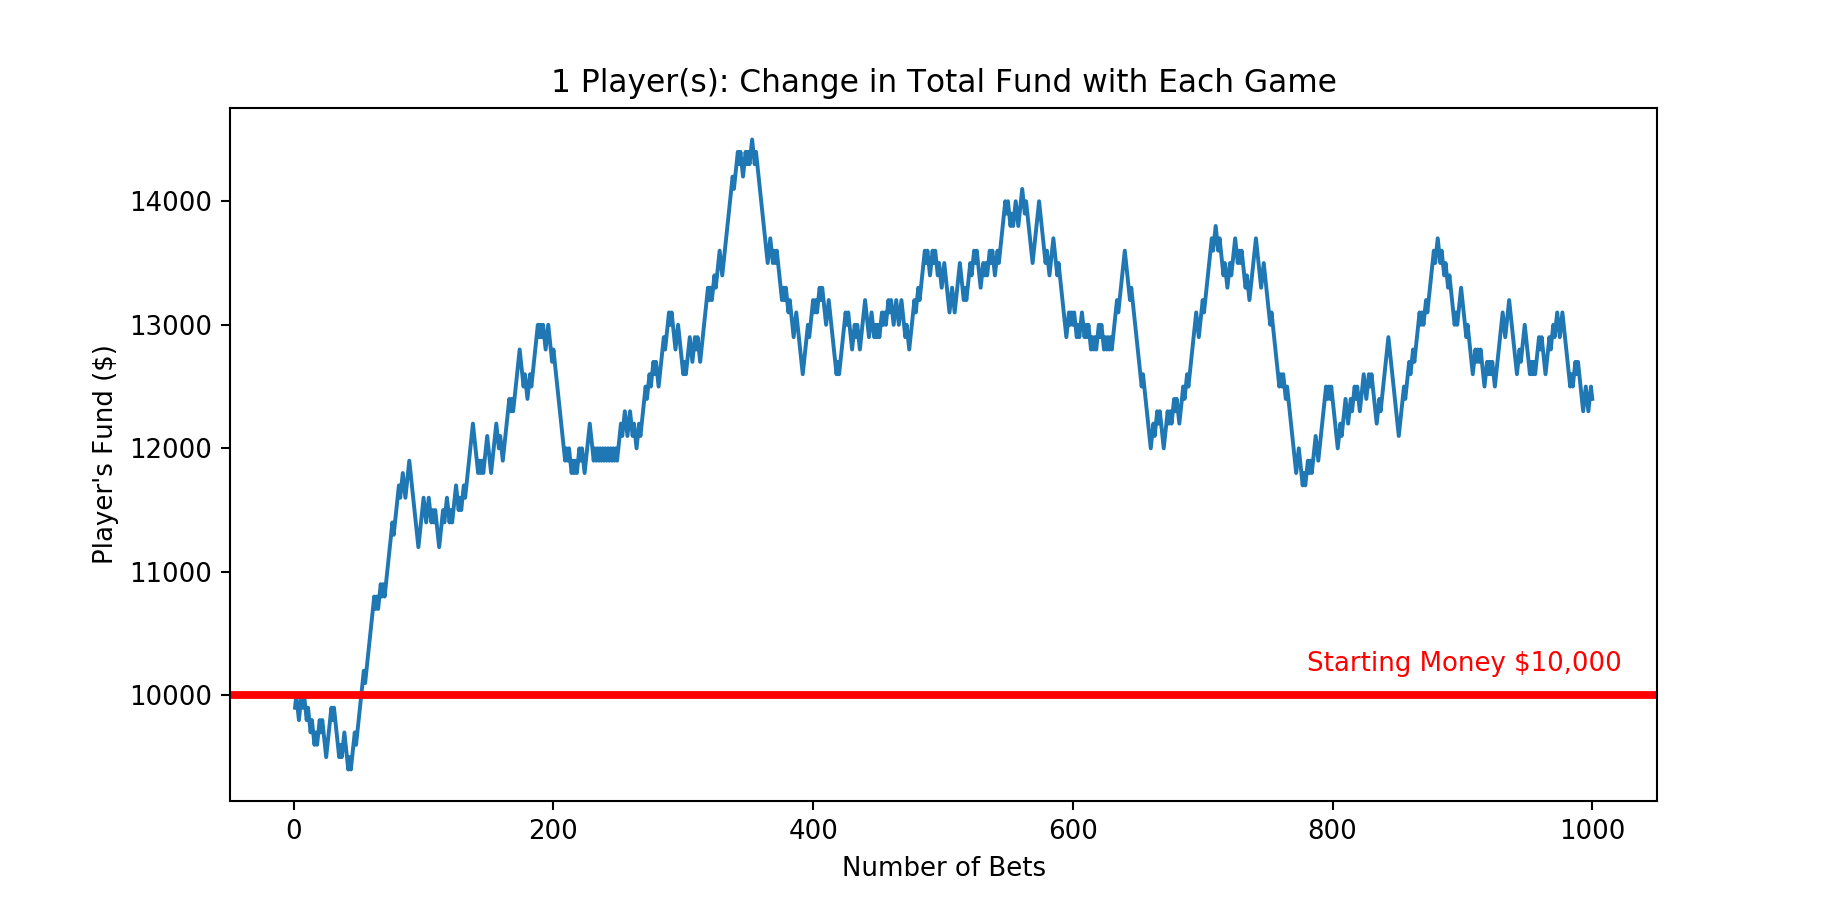

In [148]:
simulate_visualize(init_money=10000, bet=100, num_bet=1000, num_players=1)
plt.axhline(10000, color="red", linewidth=3)
plt.text(780, 10200, 'Starting Money $10,000', color='red');

Eric started with 10,000 dollars. To your surprise, Eric actually ended up earning money from the house by **2,500 dollars** after **1,000 games**. According to the configuration of the game, the house has **2% higher chance of winning** over Eric. Therefore, with such a high number of games, like a thousand, the house was supposed to earn money from the player. But it was not the case here.

Was the configuration of the game wrong, or was Eric just really lucky?

### 1.1 Monte-Carlo Simulation: 100 Players

Eric earned **$2,500 dollars** after running 1,000 games. However, if hundred other players play the Dice Roll game for thousand times each, would the result be different? From the house's perspective, what is the expected profit from the Dice Roll game?

To get more accurate estimation of the expected profit, multiple Monte-Carlo simulation will be run. In this case, hundred.

The simulation will be run with the following conditions:

1. Hundred players each start with \$10,000
2. Hundred players bet \$100 each time
3. Hundred players play the game 1,000 times

<IPython.core.display.Javascript object>


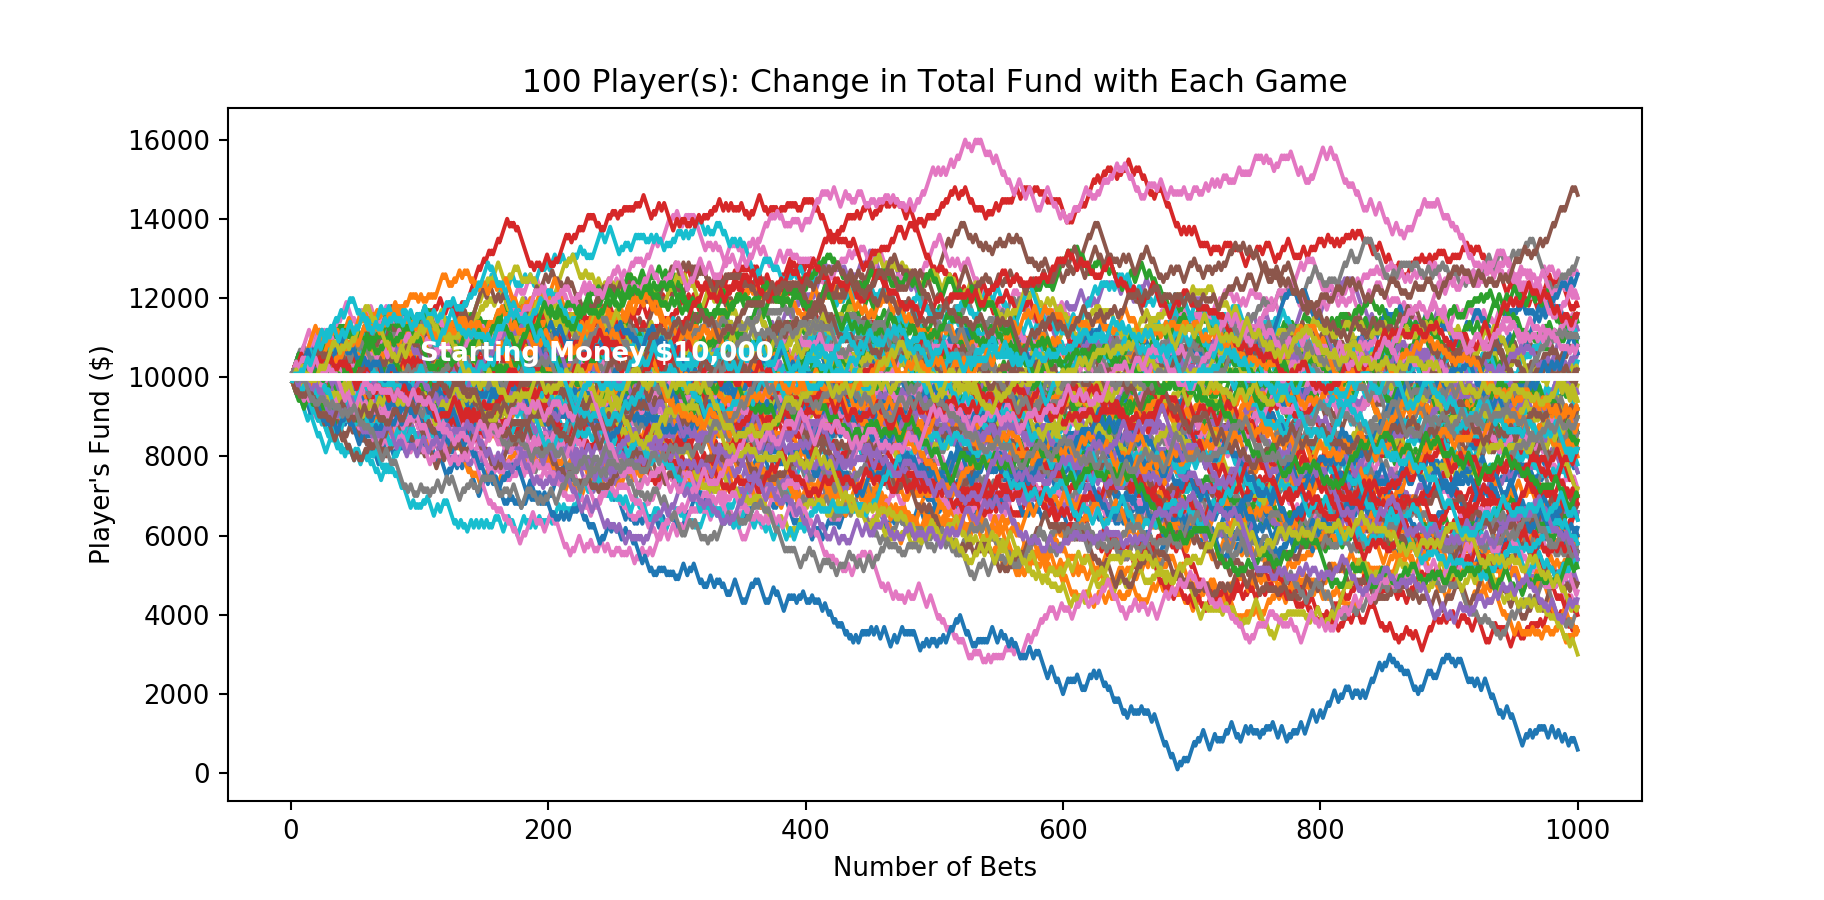

In [162]:
simulate_visualize(init_money=10000, bet=100, num_bet=1000, num_players=100)
plt.axhline(10000, color="white", linewidth=3)
plt.text(100, 10400, 'Starting Money $10,000', color='white', weight='bold');

As it can be shown on the plots, Eric's earning **2,500 dollars** after 1,000 games was a plausible outcome. There was even a player who eanred **4,500 dollars**! However, this does not mean that the house will earn negative profit. The plot clearly indicates overall trend in the house earning money over the players as the number of bets increases. 

### 1.3 Uncertainty Modeling

The previous simulation results represent the outcome of **100 players** each playing **1,000 games**. One hundred Monte-Carlo simulations were run, and now we have one hundred samples of 1,000 game simulations data. 

To obtain more accurate uncertainty model for the Dice Roll game, further simulations will be run for **1,000 players** each playing **100, 1,000, 10,000, and 100,000 games**. 

In [449]:
df = pd.DataFrame()
for num_games in [100, 1000, 5000, 10000]:
    result = simulate(init_money=10000, bet=100, num_bet=num_games, num_players=1000)
    col_name = str(num_games) + ' Games ($)'
    df[col_name] = result

In [459]:
df.index.name = 'Player Number'
df.head(10)

,100 Games ($),1000 Games ($),5000 Games ($),10000 Games ($)
Player Number,,,,
0,8600,8400,-3200,-600
1,10000,6800,-6600,-4200
2,9200,8800,3200,7200
3,9200,7600,11000,-15800
4,9600,11800,8200,-2600
5,8800,9200,0,-24800
6,8200,9000,7000,-1400
7,9800,5600,1600,-1000
8,10200,6600,7200,9800


<div class="alert alert-info">
    <h4>Notes</h4>
    <p>Each column is one **Bootstrap realization** of for N number of games. The current simulated data has one bootstrap realization for each of 4 different distributions of 100 Games, 1000 Games, 5000 Games, 10000 Games of data. Uncertainty model in summary statistics can be formulated for each N number of games with more Bootstrap realizations. For more information about Bootstrapping, refer to this link...</p>
</div>

<IPython.core.display.Javascript object>


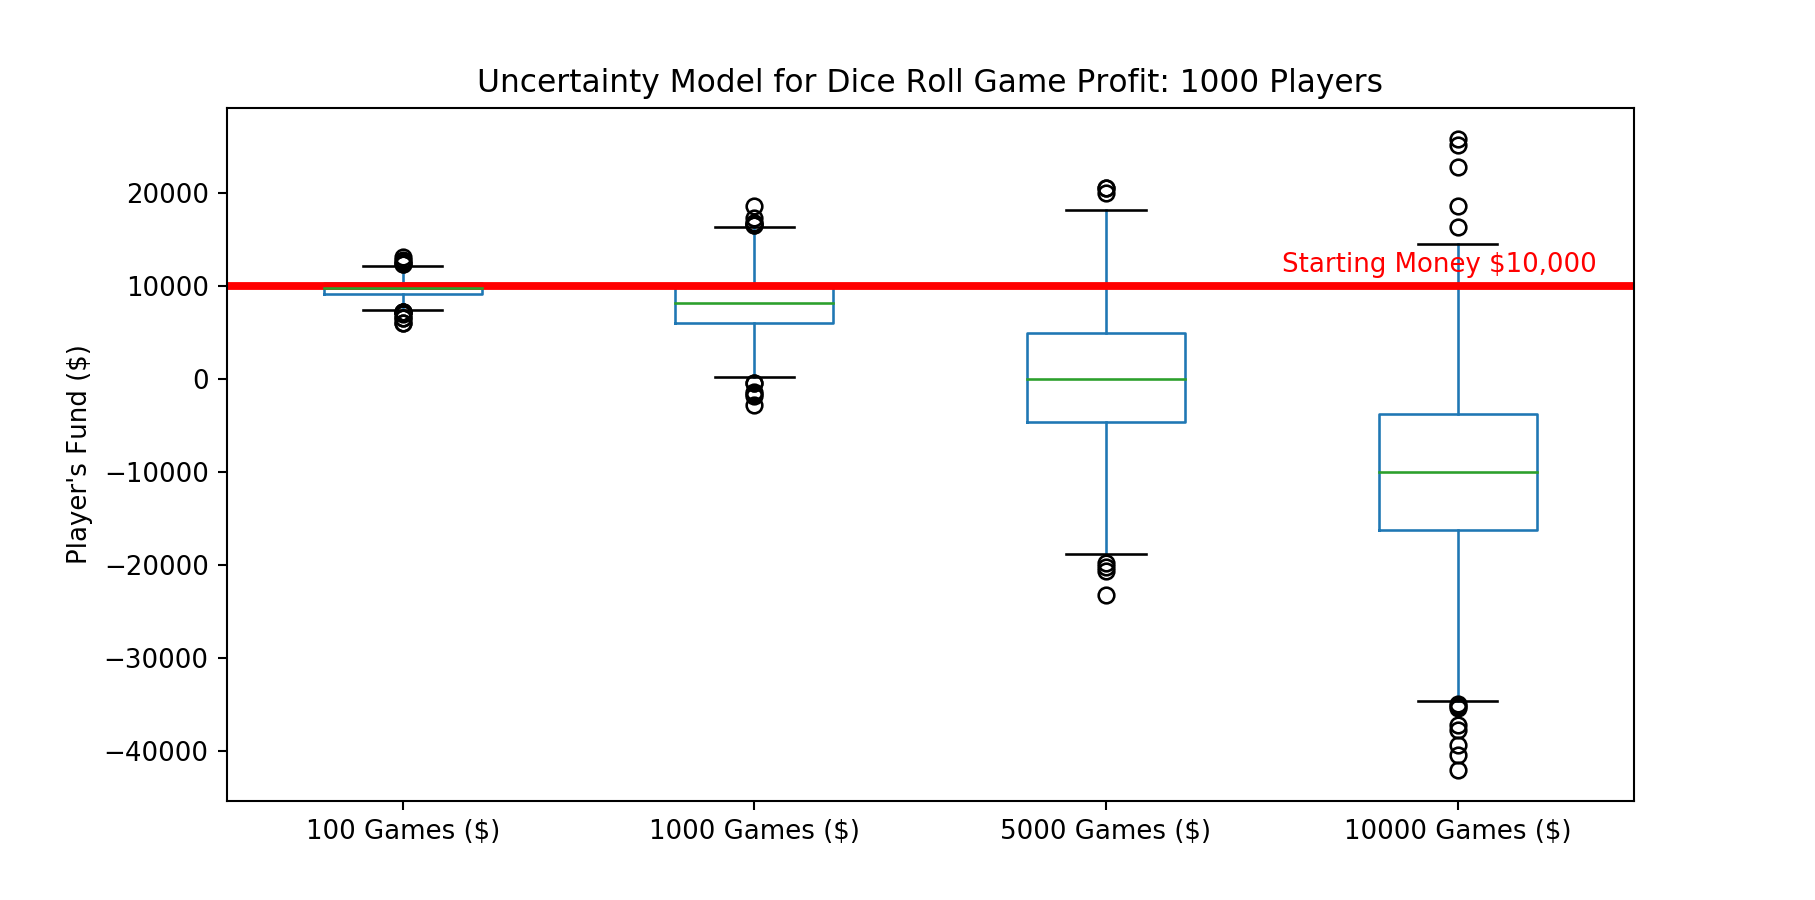

In [452]:
ax = df.boxplot(grid=False)
ax.set_title('Uncertainty Model for Dice Roll Game Profit: 1000 Players')
ax.set_ylabel('Player\'s Fund ($)')
ax.axhline(10000, color="red", linewidth=3);
ax.text(3.5, 11500, 'Starting Money $10,000', color='red');

<div class="alert alert-info">
    <p>The generated box plot is the uncertainty model for Dice Roll game profit generation. It answers <b>Question 1</b> that was asked above.</p>
</div>

Based on the box plot uncertainty model, you can confirm that the longer you play, the bigger chance of you losing money. Although some lucky players may double, or even triple their money at the casino, far bigger population of the players will end up losing money to the casino.

Recall that the Dice Roll game was configured so that the Casino has **2% higher chance of winning** the game over a player.

### 1.4 Outlier Removal and Mean of the Prediction

The uncertainty model generated by Monte-Carlo simulations gives you a *range* of possible outcome. But what if you want a single *value* of the outcome? 

One simple way to address this question is to just calculate the average of the simulated data.

** Means of simulated data BEFORE outlier removal **

In [453]:
raw_mean = pd.DataFrame(df.describe().T['mean']).T
raw_mean.rename(index={'mean': 'original mean'}, inplace=True)
raw_mean

,100 Games ($),1000 Games ($),5000 Games ($),10000 Games ($)
original mean,9792.2,8034.0,77.8,-10033.6


But as it can be observed in the boxplot, the simulated data contains outliers (circled points). One might want to remove these outliers before calculating the average of the data to improve accuracy. The traditional IQR outlier detection method can be implemented.

<p><center>IQR = P75 - P25</center></p>

<p><center>Lower Fence = P25 - 1.5 $\times$ IQR</center></p>

<p><center>Upper Fence = P75 + 1.5 $\times$ IQR</center></p>

In [454]:
def get_outlier_params(orig_data):
    iqr_params = orig_data.describe().T[['25%' , '75%']]
    iqr_params['IQR'] = iqr_params['75%'] - iqr_params['25%']
    iqr_params['Lower Fence'] = iqr_params['25%'] - 1.5 * iqr_params['IQR']
    iqr_params['Upper Fence'] = iqr_params['75%'] + 1.5 * iqr_params['IQR']
    return iqr_params

In [455]:
iqr_params = get_outlier_params(df)
iqr_params

,25%,75%,IQR,Lower Fence,Upper Fence
100 Games ($),9200.0,10400.0,1200.0,7400.0,12200.0
1000 Games ($),6000.0,10200.0,4200.0,-300.0,16500.0
5000 Games ($),-4600.0,5000.0,9600.0,-19000.0,19400.0
10000 Games ($),-16200.0,-3750.0,12450.0,-34875.0,14925.0


** Means of simulated data AFTER outlier removal **

In [456]:
def remove_outliers(outlier_params, data):
    outlier_removed_df = pd.DataFrame()
    for column in df.columns:
        outlier_removed_df[column] = data[column].apply(lambda x: x if x > outlier_params['Lower Fence'][column] else np.nan)
        outlier_removed_df[column] = data[column].apply(lambda x: x if x < outlier_params['Upper Fence'][column] else np.nan)
    return outlier_removed_df

In [457]:
new_df = remove_outliers(iqr_params, df)
new_mean = pd.DataFrame(new_df.describe().round(1).T['mean']).T
new_mean.rename(index={'mean': 'outlier-removed mean'}, inplace=True)

pd.concat([raw_mean, new_mean])

,100 Games ($),1000 Games ($),5000 Games ($),10000 Games ($)
original mean,9792.2,8034.0,77.8,-10033.6
outlier-removed mean,9772.8,7979.1,16.6,-10193.4


<div class="alert alert-info">
    <p>The obtained means tell us that around <b>5000 games</b> are need until a player loses <b>10,000 dollars</b>, given that the player bets <b>100 dollars</b> each game. It answers <b>Question 2</b> that was asked above.</p>
</div>

### 1.5 Uncertainty Modeling in Summary Statistics with Bootstrapping (still working on it...)

The mean of the dice roll distribution was obtained for eahc of 100, 1000, and 10000 game plays. But, how sure are you about the obtained mean of the distribution? 

Let say you want to have a record of the summary statistics of the data you obtained a really hard way. You want those summary statistics to be accurate. Remember that Monte-Carlo simulation requires the knowledge of the distribution shape and summary stats of the sample population. 

Question to Pycrz -- Is getting uncertainty in summary stats even practical? I mean its a cool thing to do, but the uncertainty in summary stats arent that significant u know. 

## 2. Oil Field Example: Total Thickness of Two Formations

Your company is about to drill into two formations: *formation A* and *formation B*. From the previous experiences within the asset, you know the the distribution of each formation's thickness (which is rarely the case...). In order to develop production / facility plans, you need to draw an uncertainty model for the total thickness of *formation A* + *formation B*.

![Formations](https://github.com/aegis4048/Petroleum_Engineering/blob/master/Data%20Analysis/img/formation_thickness.png?raw=true)



### 2.0 Assumptions

Before Monte-Carlo simulation is run to develop the uncertainty model, we need to go through a few assumptions. 

1. The distribution of formation thickness in the asset is Gaussian. 
2. Formation A has a mean value of 10 ft, and standard deviation of 2 ft.
3. Formation B has a mean value of 24 ft, and standard deviation of 4 ft. 

**Recall that Monte-Carlo simulation requires prior knowledge of the shape of the distribution, and its summary statistics.**

In [17]:
assumptions = pd.DataFrame(data=[[10, 24],[2, 4]], columns=['Formation A (ft)', 'Formation B (ft)'], index=['mean', 'stdev'])
assumptions

,Formation A (ft),Formation B (ft)
mean,10,24
stdev,2,4


One might ask why Monte-Carlo simulation is need for this task. Why can't we just add the means of the two formations and use it for our thickness model? 

<p><center>Total Thickness = Form. A Mean Thickness + Form. B Mean Thickness</center></p>
<p><center>Total Thickness = 10 ft + 24 ft = 34 ft</center></p>

However, this simple forecast model does not give any information about the uncertainty in the total thickness of the formation. That is, we only know the overall **mean** thickness, but nothing about the possible **range** of thickness of the formations. Ideally we want to formulate something like the following:

<div class="alert alert-info">
    <p>The total formation thickness will fall within the range of 27 ~ 41 ft by 80% chance, with 34 ft being the mean of the distribution.</p>
</div>

Monte-Carlo simulation can be helpful in constructing more robust forecast model than just adding the means of the two distributions.

### 2.1 Monte-Carlo Simulation for Gaussian Distribution

** Steps **
1. Using the provided mean and standard deviation, generate a random Gaussian distribution of Formation A and B thickness. Recall that we assumed the thickness distribution to be Gaussian. Generate random thickness values N times.
2. Add the randomly generated thickness values for Formation A and B. 
3. Generate visualizations (CDF, boxplot, etc...)

**np.random.normal()** will be used to generate random normal distribution of formation thickness. If the distribution was assumed to be different, other function will be used. For more information, check the numpy documentation of [random sampling for different distributions](https://docs.scipy.org/doc/numpy-1.14.1/reference/routines.random.html). 

In [50]:
mean_A = assumptions['Formation A (ft)']['mean']
mean_B = assumptions['Formation B (ft)']['mean']
std_A = assumptions['Formation A (ft)']['stdev']
std_B = assumptions['Formation B (ft)']['stdev']

iteration = 1000

monte_A = np.random.normal(mean_A, std_A, iteration)   
monte_B = np.random.normal(mean_A, std_B, iteration)
total_thic = monte_A + monte_B

df_thic = pd.DataFrame([monte_A, monte_B, total_thic], index=['Formation A (ft)', 'Formation B (ft)', 'Total Thickness (ft)']).T
df_thic.index.name = 'Iteration'
df_thic.round(1).head(10)

,Formation A (ft),Formation B (ft),Total Thickness (ft)
Iteration,,,
0,9.2,11.2,20.4
1,10.9,8.5,19.4
2,8.1,12.6,20.7
3,14.6,14.3,28.9
4,8.3,8.4,16.8
5,11.2,-0.0,11.2
6,12.5,7.6,20.1
7,7.8,15.1,22.9
8,9.7,12.6,22.3


** Visualizations **

Cumulative probablity function (CDF) and boxplot can be used to visualize the simulation result.

<IPython.core.display.Javascript object>


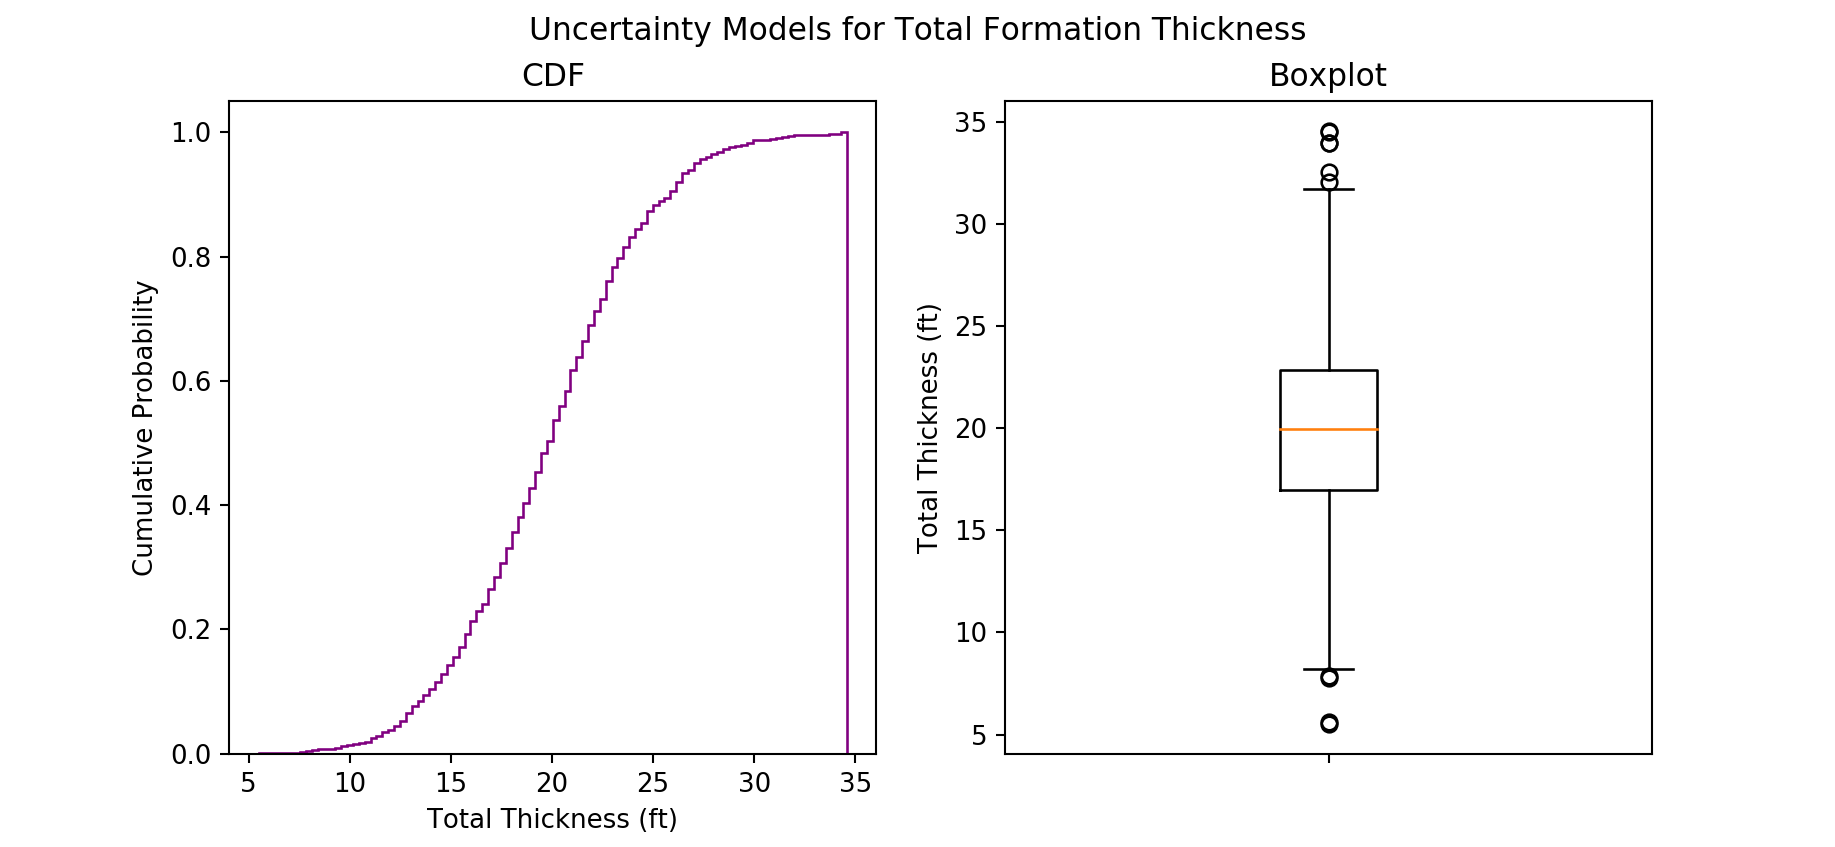

In [98]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
fig.suptitle('Uncertainty Models for Total Formation Thickness')

ax1.hist(df_thic['Total Thickness (ft)'], bins=100, density=True, cumulative=True, histtype='step', color='purple')
ax1.set_title('CDF')
ax1.set_ylabel('Cumulative Probability')
ax1.set_xlabel('Total Thickness (ft)')

ax2.boxplot(df_thic['Total Thickness (ft)'])
ax2.set_title('Boxplot')
ax2.set_ylabel('Total Thickness (ft)');
ax2.set_xticklabels([]);

** Business Decision on P10, P50, and P90 Statistics **

Many of the business decisions are made on P10, P50, and P90 values. When reporting your statistical analysis to the management, you want to provide them the most likely *range* of outcome.

In [105]:
pd.DataFrame(df_thic['Total Thickness (ft)'].describe(percentiles=[0.1, 0.9])).T.iloc[:, 4:7].round(1)

,10%,50%,90%
Total Thickness (ft),14.1,20.0,26.0


Based on the obtained P10, P50, and P90 values, the following forcast can be constructed:

<div class="alert alert-info">
    <p>The total formation thickness will fall within the range of 14.1 ~ 26.0 ft by 80% chance, with 20.0 ft being the mean of the distribution.</p>
</div>